In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib as plt
import math
import pytz
import datetime
import glob
from pandas.tseries.offsets import DateOffset
dt = datetime.datetime.today()

%matplotlib inline
plt.style.use('ggplot')
# https://github.com/llluns/spotify_data_analysis/blob/main/Spotify_Preprocessing_Pt_2.ipynb

In [2]:
# #for jmg
# df = pd.read_json('jmgodfreyData/StreamingHistory0.json')
# df['endTime'] = pd.to_datetime(df['endTime'])
# df['endTime'] = df['endTime'] + DateOffset(hours=5)

In [3]:
# #for mcairth
# df = pd.read_json('mcdata/StreamingHistory0.json')
# df['endTime'] = pd.to_datetime(df['endTime'])
# df['endTime'] = df['endTime'] + DateOffset(hours=5)

In [7]:
# For Danny boy
path = r'dandata'
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename)
    li.append(df)

df_thork = pd.concat(li)

In [5]:
# # For Thork
# path = r'thorkdata'
# all_files = glob.glob(path + "/*.json")

# li = []

# for filename in all_files:
#     df = pd.read_json(filename)
#     li.append(df)

# df_thork = pd.concat(li)

In [6]:
# # For Chris
# path = r'chrisdata'
# all_files = glob.glob(path + "/*.json")

# li = []

# for filename in all_files:
#     df = pd.read_json(filename)
#     li.append(df)

# df_thork = pd.concat(li)

In [6]:
# # For jakes
# path = r'jlgdata'
# all_files = glob.glob(path + "/*.json")

# li = []

# for filename in all_files:
#     df = pd.read_json(filename)
#     li.append(df)

# df_jakes = pd.concat(li)

In [8]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['endTime'] = df['endTime'] + DateOffset(hours=5)
df['year'] = df['endTime'].dt.year
df['month'] = df['endTime'].dt.month
df['day'] = df['endTime'].dt.day
df['hour'] = df['endTime'].dt.hour
df['weekday'] = df['endTime'].dt.dayofweek
df['timeplayed']=df['msPlayed']/60000
df['artistSong'] = df['artistName'] + ', ' + df['trackName']
df['MM-DD'] = df['endTime'].dt.strftime('%m-%d')
# df = df[df['timeplayed'] > 1] #run this to only keep songs you listened to for more than 1 minute
# df

<AxesSubplot:title={'center':'What artists did you listen to the most times?'}, xlabel='Artist', ylabel='# times listened'>

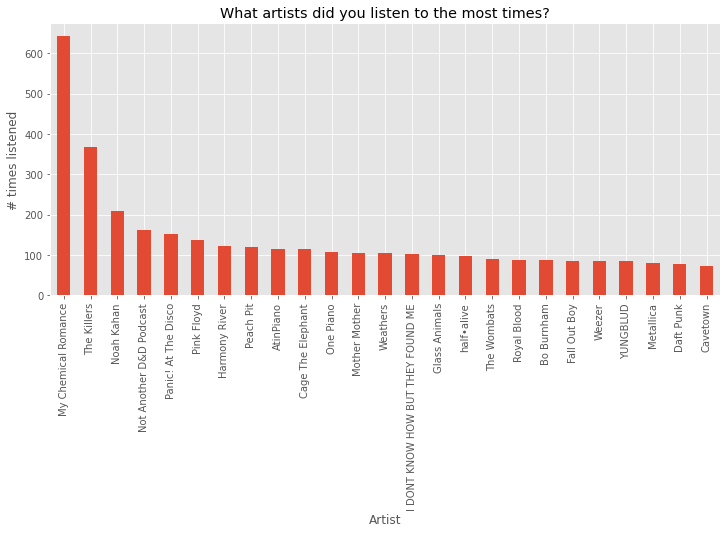

In [9]:
popArtist = df.pivot_table(index=['artistName'], aggfunc='size')
popArtist.sort_values(ascending=False, inplace=True)
popArtist = popArtist[:25]
popArtist.plot.bar(xlabel='Artist', ylabel='# times listened', title='What artists did you listen to the most times?', figsize=(12,5))

<AxesSubplot:title={'center':'What song did you listen to the most times?'}, xlabel='Artist', ylabel='# times listened'>

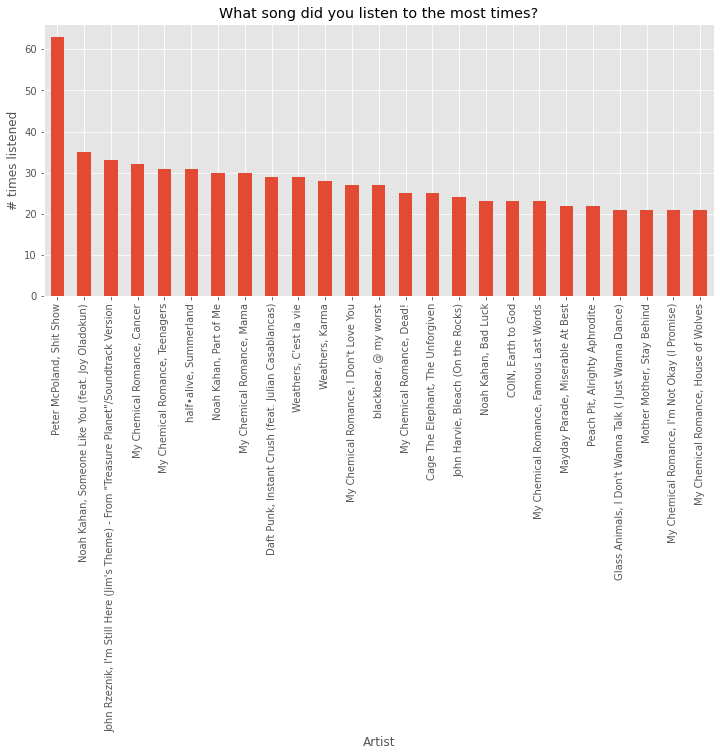

In [10]:
popSong = df.pivot_table(index=['artistSong'], aggfunc='size')
popSong.sort_values(ascending=False, inplace=True)
popSong = popSong[:25]
popSong.plot.bar(xlabel='Artist', ylabel='# times listened', title='What song did you listen to the most times?', figsize=(12,5))

<AxesSubplot:title={'center':'How long did you listen to spotify for each day?'}, xlabel='Date', ylabel='Mins listend'>

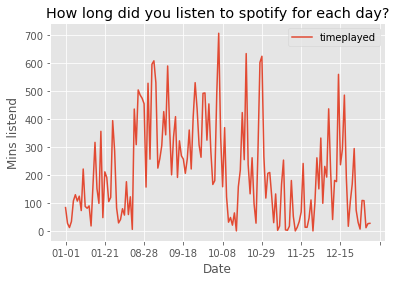

In [11]:
dailyPattern = df.pivot_table(values=['timeplayed'], index=['MM-DD'], aggfunc=np.sum)
dailyPattern.plot(xlabel='Date', ylabel='Mins listend', title='How long did you listen to spotify for each day?')

In [12]:
# # what song did you skip the most
# df_short = df[df['timeplayed'] < .3]
# skipped = df_short.pivot_table(index=['trackName'], aggfunc='size')
# skipped.sort_values(ascending=False, inplace=True)
# skipped = skipped[:10]
# print(skipped)

<AxesSubplot:title={'center':'What days did you listen to music the most?'}, xlabel='Day (0 = Monday)', ylabel='Mean Minutes Listened'>

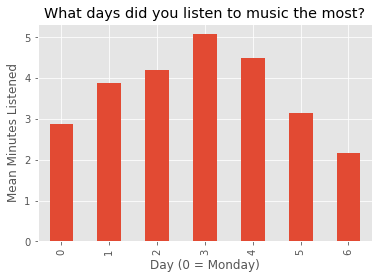

In [13]:
dailyPattern = df.pivot_table(values=['timeplayed'], index=['weekday'], aggfunc=np.mean)
dailyPattern.plot.bar(xlabel='Day (0 = Monday)', ylabel='Mean Minutes Listened', title='What days did you listen to music the most?', legend=False)

<AxesSubplot:title={'center':'What time of day did you listen to music the most?'}, xlabel='Hour', ylabel='Mean Minutes Listened'>

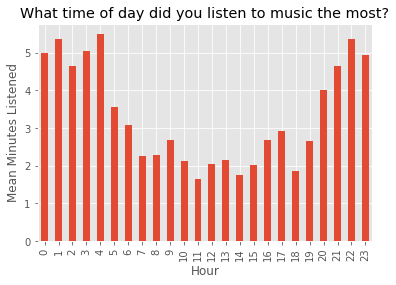

In [14]:
hourlyPattern = df.pivot_table(values=['timeplayed'], index=['hour'], aggfunc=np.mean)
hourlyPattern.plot.bar(xlabel='Hour', ylabel='Mean Minutes Listened', title='What time of day did you listen to music the most?', legend=False)